In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
idx = pd.IndexSlice

def get_connection(credentials):
    conn = psycopg2.connect(dbname=credentials["dbname"], 
                            user=credentials["user"], 
                            host=credentials["host"], 
                            password=credentials["password"])
    return conn

/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


# Load Data

In [ ]:
conn = get_connection({
    "dbname" : "...",
    "user" : "...",
    "password" : "...",
    "host" : "lx-ebikes-pg.postgres.database.azure.com"
})

df_source = pd.read_sql_query('SELECT * from dev.fact_gira_data',con=conn)
df = df_source.set_index(["datetime","gira_station_id"])

In [10]:
df.head()

,,num_bikes,num_dockings,station_state
datetime,gira_station_id,,,
2019-04-09 23:44:10.137460,1,2,20,active
2019-04-09 23:44:10.154894,453,6,14,active
2019-04-09 23:44:10.157923,114,10,10,active
2019-04-09 23:44:10.160861,450,4,10,active
2019-04-09 23:44:10.163936,423,8,10,active


In [ ]:
!mkdir database_extracts

In [ ]:
df_source.to_csv("db_extract.csv")
df_source.to_pickle("db_extract.pickle")

# Data on all stations

In [3]:
df.head()


,,num_bikes,num_dockings,station_state
datetime,gira_station_id,,,
2019-04-09 23:44:10.137460,1,2,20,active
2019-04-09 23:44:10.154894,453,6,14,active
2019-04-09 23:44:10.157923,114,10,10,active
2019-04-09 23:44:10.160861,450,4,10,active
2019-04-09 23:44:10.163936,423,8,10,active



### Sort stations by number of records and variation of number of bikes

In [4]:
df_stations = df.num_bikes.groupby("gira_station_id").agg(["count", "std"]).sort_values(by=["count","std"],ascending = False)
stations = df_stations.index
df_stations.head()

,count,std
gira_station_id,,
420,2543,5.874862
484,2543,5.124409
110,2543,5.019219
417,2543,4.913939
109,2543,4.379425


# Start exploring

In [ ]:
def plot_station_id(station_id):
  station_data = df.loc[idx[:,station_id],:].reset_index(level = 1, drop=True)
  plt.figure(figsize=(15,3))
  station_data.num_bikes.plot()
  plt.title(f"Station_id: {station_id}")
  plt.show()

### Plot for more interesting stations

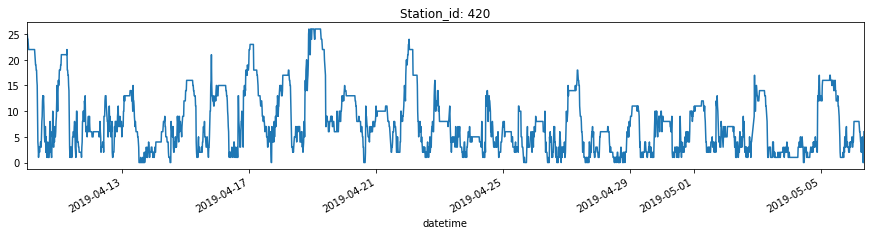

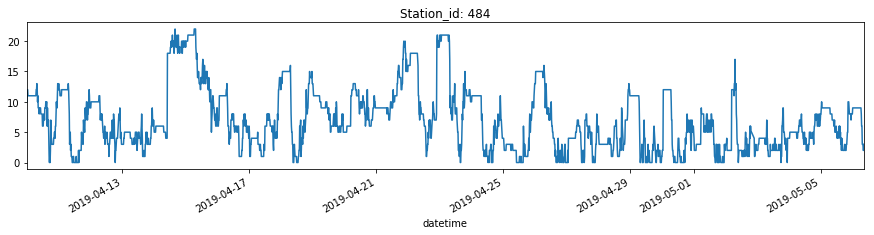

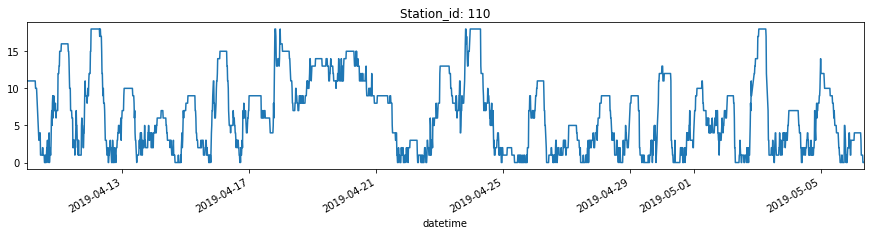

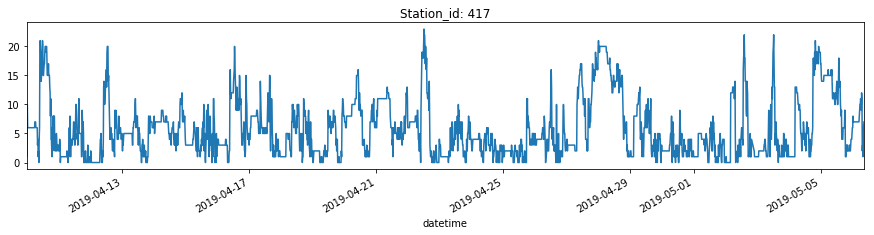

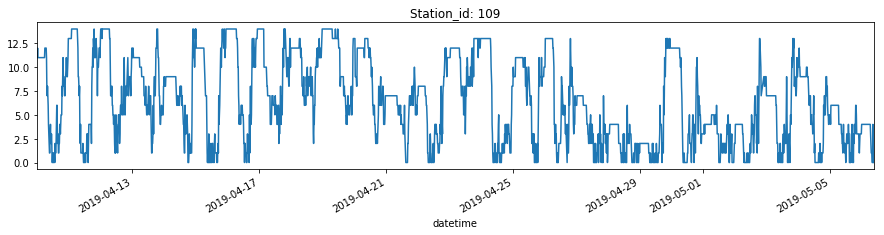

In [6]:
for sid in stations[:5]:
  plot_station_id(sid)